# RSI strategy
This is an attempt to bactest the 10 biggest crypto coins by market capitalization (excluding stable coins) using the RSI indicator. The RSI is a widely used technical indicator and an oscillator that indicates a market is overbought when the RSI value is over 70 and indicates oversold conditions when RSI readings are under 30.

The coins we would be testing are BTC - Bitcoin, Ethereum, Chain Native Token, Ripple, Enegra, Cardano, Solana, DogeCoin, Polygon and Dai. 

Let's start with Bitcoin

## Bitcoin

Return  =>  -0.8713545993409428
Number of trades  =>  19
Winning trades (%)  =>  14.95548416992863
Losing trades (%)  =>  -27.077189061540352
Max drawdown  =>  -0.9428024607794175
Sharpe ratio  =>  -0.32910488832916096


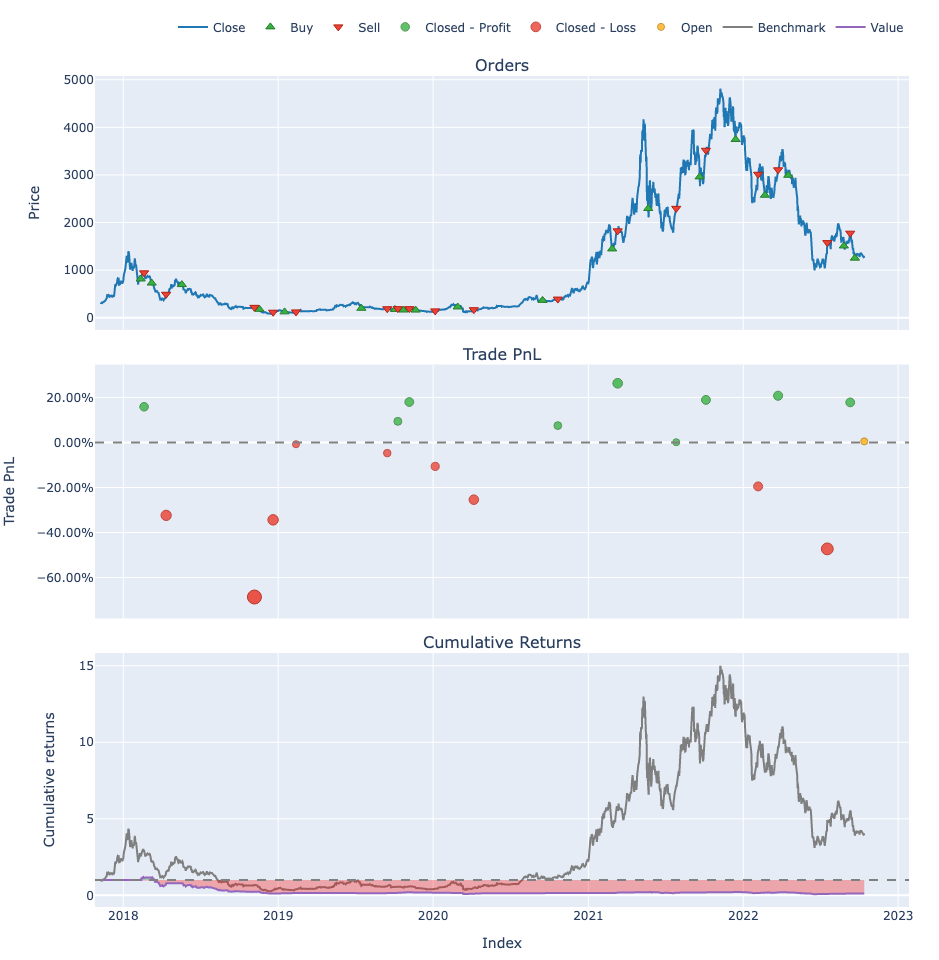

In [115]:
import pandas as pd
import vectorbt as vbt
import yfinance as yf

def rsi_backtest(coin):
    coin_price = vbt.YFData.download(coin, missing_index='drop').get("Close")
    coin_rsi = vbt.RSI.run(coin_price)
    entries = coin_rsi.rsi_crossed_below(30)
    exits = coin_rsi.rsi_crossed_above(70)

    # set up portfolio
    pf = vbt.Portfolio.from_signals(coin_price, entries, exits)
    ret = pf.total_return()
    sr = pf.sharpe_ratio()
    max_drawdown = pf.max_drawdown()
    num_trades = pf.stats()[11]
    percent_avg_win_trades = pf.stats()[18]
    percent_avg_loss_trades = pf.stats()[19]
    metrics = {"Return": ret, 
               "Number of trades": num_trades,
               "Winning trades (%)": percent_avg_win_trades,
               "Losing trades (%)": percent_avg_loss_trades,
              "Max drawdown": max_drawdown, "Sharpe ratio": sr}
    return metrics, pf
    
def plot_pf(met):
    mets = met[0]
    for key,value in mets.items():
        print(key, " => ", value)
    #met[1].plot().show()
    
eth = rsi_backtest("ETH-USD")
plot_pf(eth)

Return  =>  -0.3953398919278777
Number of trades  =>  26
Winning trades (%)  =>  18.331446948608978
Losing trades (%)  =>  -17.735561629745096
Max drawdown  =>  -0.8662047973985733
Sharpe ratio  =>  0.1431962559254015


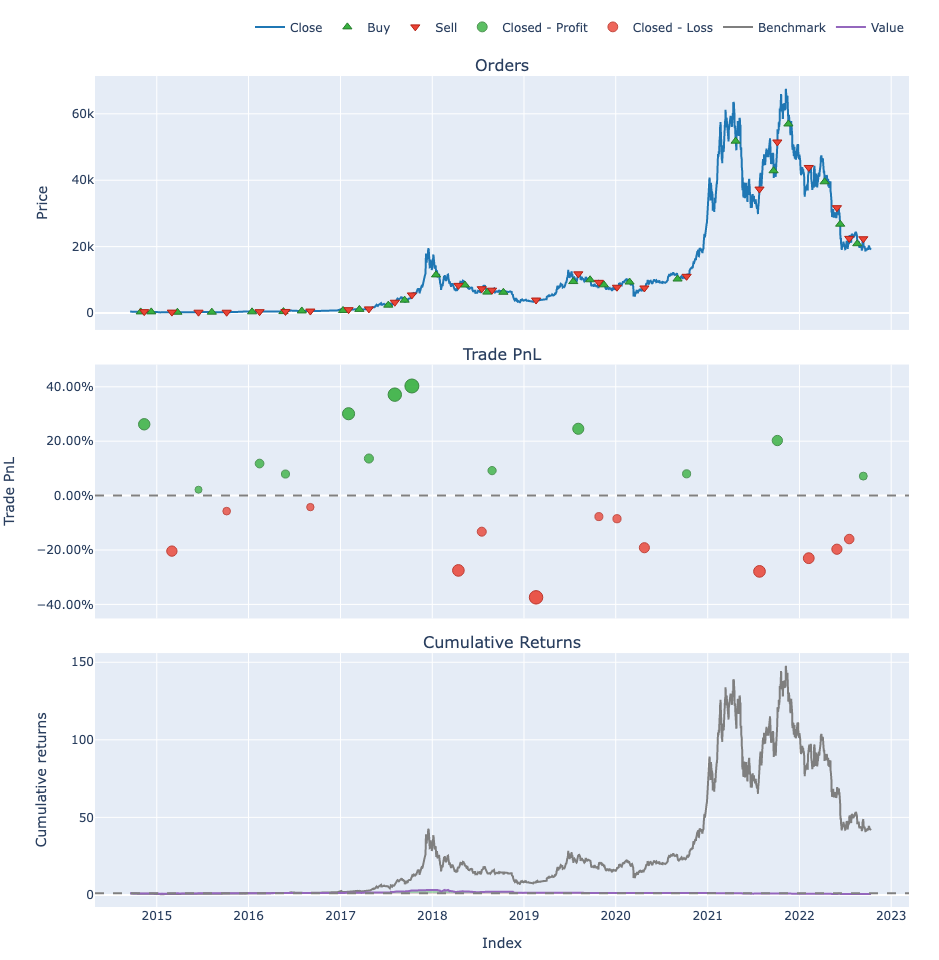

In [131]:
def bbands_backtests(coin):
    coin_price = vbt.YFData.download("BTC-USD", missing_index='drop').get("Close")
    coin_bbands = vbt.BBANDS.run(coin_price)
    entries = coin_bbands.close_crossed_below(coin_bbands.lower)
    exits = coin_bbands.close_crossed_above(coin_bbands.upper)
   
     # set up portfolio
    pf = vbt.Portfolio.from_signals(coin_price, entries, exits)
    ret = pf.total_return()
    sr = pf.sharpe_ratio()
    max_drawdown = pf.max_drawdown()
    num_trades = pf.stats()[11]
    percent_avg_win_trades = pf.stats()[18]
    percent_avg_loss_trades = pf.stats()[19]
    metrics = {"Return": ret, 
               "Number of trades": num_trades,
               "Winning trades (%)": percent_avg_win_trades,
               "Losing trades (%)": percent_avg_loss_trades,
              "Max drawdown": max_drawdown, "Sharpe ratio": sr}
    return metrics, pf

    
eth_bb = bbands_backtests("BTC-USD")
plot_pf(eth_bb)

/tmp/ipykernel_2251134/3108020424.py:12: UserWarning:

Object has multiple columns. Aggregating using <function mean at 0xffff8c09b940>. Pass column to select a single column/group.

/tmp/ipykernel_2251134/3108020424.py:13: UserWarning:

Object has multiple columns. Aggregating using <function mean at 0xffff8c09b940>. Pass column to select a single column/group.

/tmp/ipykernel_2251134/3108020424.py:14: UserWarning:

Object has multiple columns. Aggregating using <function mean at 0xffff8c09b940>. Pass column to select a single column/group.



({'Return': High    -0.975813
  Low     -0.937414
  Close   -0.022801
  Name: total_return, dtype: float64,
  'Number of trades': 67.0,
  'Winning trades (%)': 7.410001515812961,
  'Losing trades (%)': -14.179973151055277,
  'Max drawdown': High    -0.979579
  Low     -0.953537
  Close   -0.793244
  Name: max_drawdown, dtype: float64,
  'Sharpe ratio': High    -0.854630
  Low     -0.398073
  Close    0.260205
  Name: sharpe_ratio, dtype: float64},
 FigureWidget({
     'data': [{'name': '%K',
               'showlegend': True,
               'type': 'scatter',
               'uid': 'dd49d05c-24da-4be8-8be1-3ee4cba2640f',
               'x': array([datetime.datetime(2014, 9, 17, 0, 0, tzinfo=datetime.timezone.utc),
                           datetime.datetime(2014, 9, 18, 0, 0, tzinfo=datetime.timezone.utc),
                           datetime.datetime(2014, 9, 19, 0, 0, tzinfo=datetime.timezone.utc), ...,
                           datetime.datetime(2022, 10, 11, 0, 0, tzinfo=datetime.t